**Data Structure**

Three (3) data sets are included in the data packet (IMS-Rexnord Bearing Data.zip). Each data set describes a test-to-failure experiment. Each data set consists of individual files that are 1-second vibration signal snapshots recorded at specific intervals. Each file consists of 20,480 points with the sampling rate set at 20 kHz. The file name indicates when the data was collected. Each record (row) in the data file is a data point. Data collection was facilitated by NI DAQ Card 6062E. Larger intervals of time stamps (showed in file names) indicate resumption of the experiment in the next working day.

**Set No. 1**

| Index                    | Description                                                                                                                   |
|--------------------------|-------------------------------------------------------------------------------------------------------------------------------|
| Recording Duration:      | October 22, 2003 12:06:24 to November 25, 2003 23:39:56                                                                       |
| No. of Files:            | 2,156                                                                                                                         |
| No. of Channels:         | 8                                                                                                                             |
| Channel Arrangement:     | Bearing 1 – Ch 1&2; Bearing 2 – Ch 3&4; Bearing 3 – Ch 5&6; Bearing 4 – Ch 7&8.                                               |
| File Recording Interval: | Every 10 minutes (except the first 43 files were taken every 5 minutes)                                                       |
| File Format:             | ASCII                                                                                                                         |
| Description:             | At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect in bearing 4. |

**Set No. 2**

| Index                    | Description                                                                             |
|--------------------------|-----------------------------------------------------------------------------------------|
| Recording Duration:      | February 12, 2004 10:32:39 to February 19, 2004 06:22:39                                |
| No. of Files:            | 984                                                                                     |
| No. of Channels:         | 4                                                                                       |
| Channel Arrangement:     | Bearing 1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing 4 – Ch 4.                    |
| File Recording Interval: | Every 10 minutes                                                                        |
| File Format:             | ASCII                                                                                   |
| Description:             | At the end of the test-to-failure experiment, outer race failure occurred in bearing 1. |

**Set No. 3**

| Index                    | Description                                                                             |
|--------------------------|-----------------------------------------------------------------------------------------|
| Recording Duration:      | March 4, 2004 09:27:46 to April 4, 2004 19:01:57                                        |
| No. of Files:            | 4,448                                                                                   |
| No. of Channels:         | 4                                                                                       |
| Channel Arrangement:     | Bearing 1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing 4 – Ch 4.                    |
| File Recording Interval: | Every 10 minutes                                                                        |
| File Format:             | ASCII                                                                                   |
| Description:             | At the end of the test-to-failure experiment, outer race failure occurred in bearing 3. |

Import Required Modules

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import entropy
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# import optuna

Load Sample Data File to explore its Structure

In [9]:
dataset = pd.read_csv('Data/1st_test/2003.10.22.12.06.24', sep='\t')
dataset

,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
0,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
1,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
2,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
3,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066
4,-0.232,-0.061,-0.281,-0.125,0.046,-0.088,-0.078,-0.078
...,...,...,...,...,...,...,...,...
20474,-0.022,-0.142,0.085,-0.078,-0.200,-0.198,-0.134,-0.093
20475,0.024,-0.156,0.042,-0.039,-0.159,-0.071,-0.227,-0.132
20476,-0.193,-0.303,-0.071,-0.125,-0.237,-0.251,-0.151,0.007
20477,-0.115,0.076,-0.078,-0.332,-0.027,-0.002,-0.151,-0.005


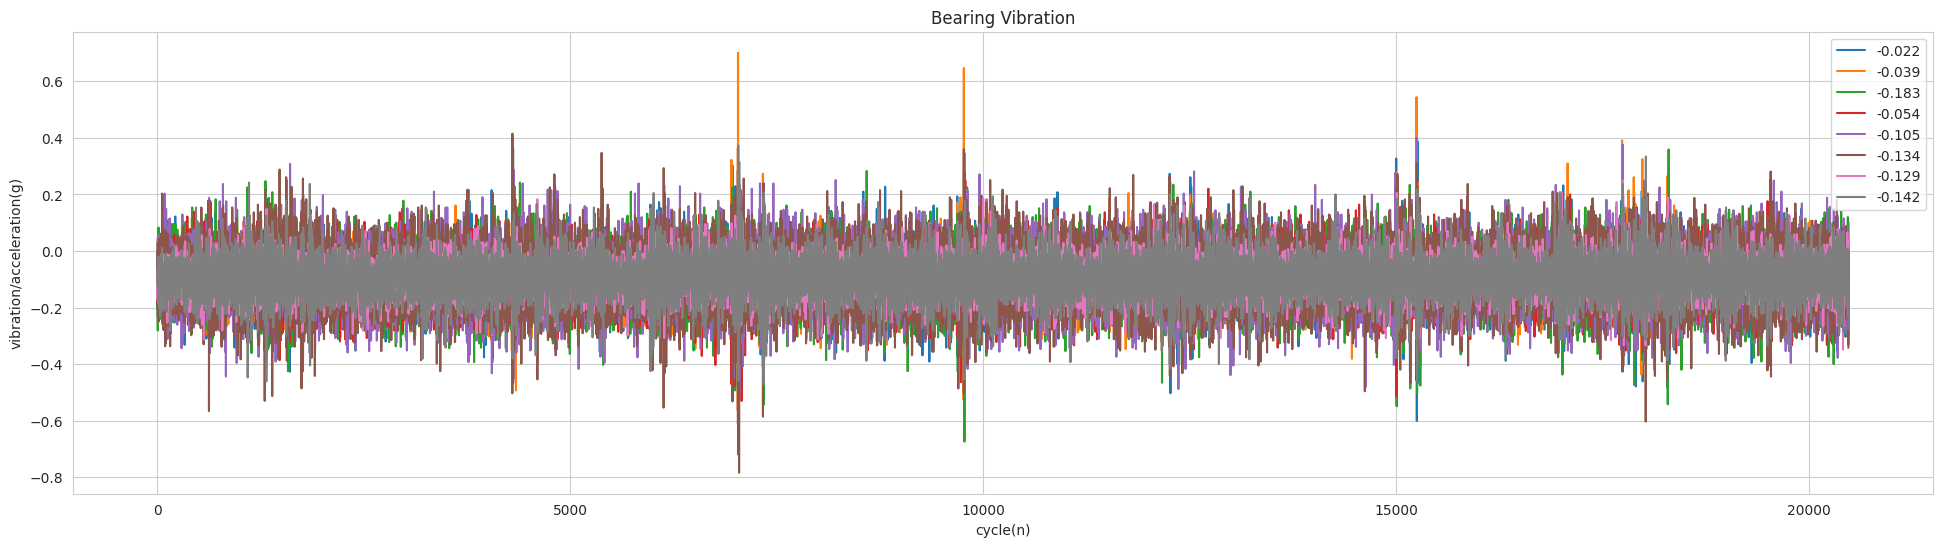

In [10]:
ax = dataset.plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()

In [ ]:
dataset_path_1st = 'Data/1st_test'
dataset_path_2nd = 'Data/2nd_test'
dataset_path_3rd = 'Data/4th_test/txt'

File 1 merging it all

In [55]:
data_frames = []

for filename in os.listdir(dataset_path_1st):
    dataset = pd.read_csv(os.path.join(dataset_path_1st, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1, 8))
    dataset_mean_abs.index = [filename]
    data_frames.append(dataset_mean_abs)

merged_data = pd.concat(data_frames)

merged_data.columns = ['Bearing 1x','Bearing 1y', 'Bearing 2x','Bearing 2y', 'Bearing 3x','Bearing 3y', 'Bearing 4x', 'Bearing 4y']

In [56]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')

merged_data = merged_data.sort_index()
merged_data.head()

,Bearing 1x,Bearing 1y,Bearing 2x,Bearing 2y,Bearing 3x,Bearing 3y,Bearing 4x,Bearing 4y
2003-10-22 12:06:24,0.104148,0.100253,0.107147,0.102004,0.106149,0.108150,0.094803,0.099513
2003-10-22 12:09:13,0.103651,0.099854,0.108189,0.102920,0.106661,0.108458,0.095070,0.093587
2003-10-22 12:14:13,0.105039,0.101543,0.108543,0.104042,0.108740,0.109875,0.096158,0.098299
2003-10-22 12:19:13,0.104900,0.101573,0.108152,0.103378,0.108068,0.110010,0.096814,0.098602
2003-10-22 12:24:13,0.104779,0.102181,0.107943,0.102629,0.108454,0.109350,0.096358,0.098471


In [59]:
merged_data.shape

(2156, 8)

In [57]:
merged_data.to_csv('ProcessedData/MergedData/DatasetBearingTest_1.csv')

<Axes: >

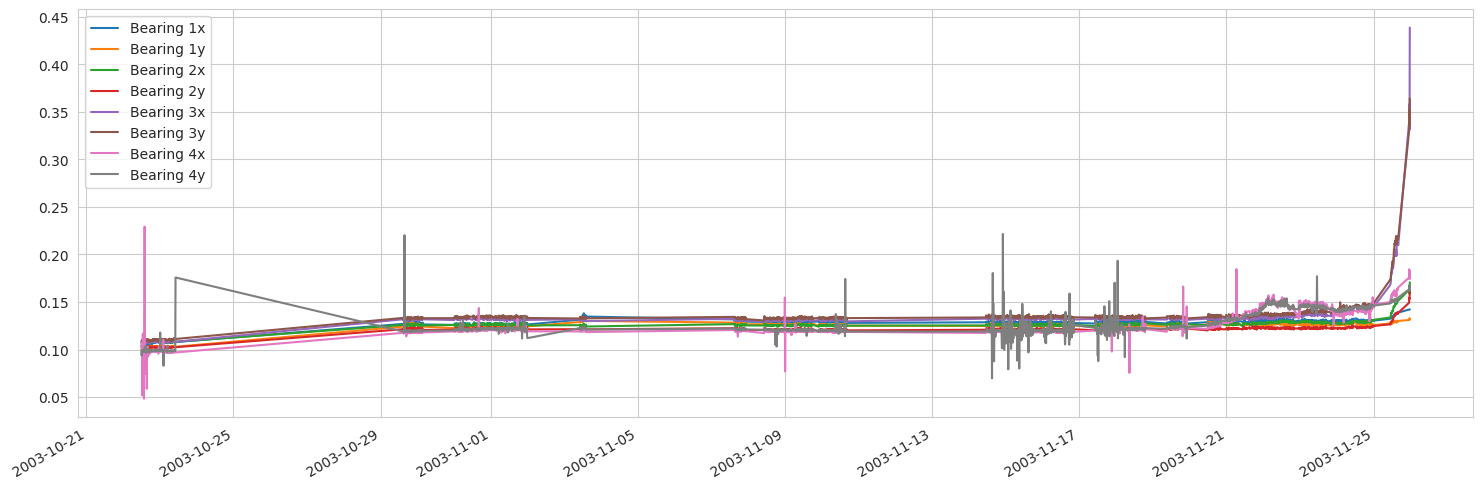

In [58]:
merged_data.plot(figsize = (18, 6))

File 2 and 3 have similar structure so lets explore it as well

In [45]:
data_frames = []

for filename in os.listdir(dataset_path_2nd):
    dataset = pd.read_csv(os.path.join(dataset_path_2nd, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1, 4))
    dataset_mean_abs.index = [filename]
    data_frames.append(dataset_mean_abs)

merged_data = pd.concat(data_frames)

merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

In [46]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')

merged_data = merged_data.sort_index()
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [49]:
merged_data.to_csv('ProcessedData/MergedData/DatasetBearingTest_2.csv')

<Axes: >

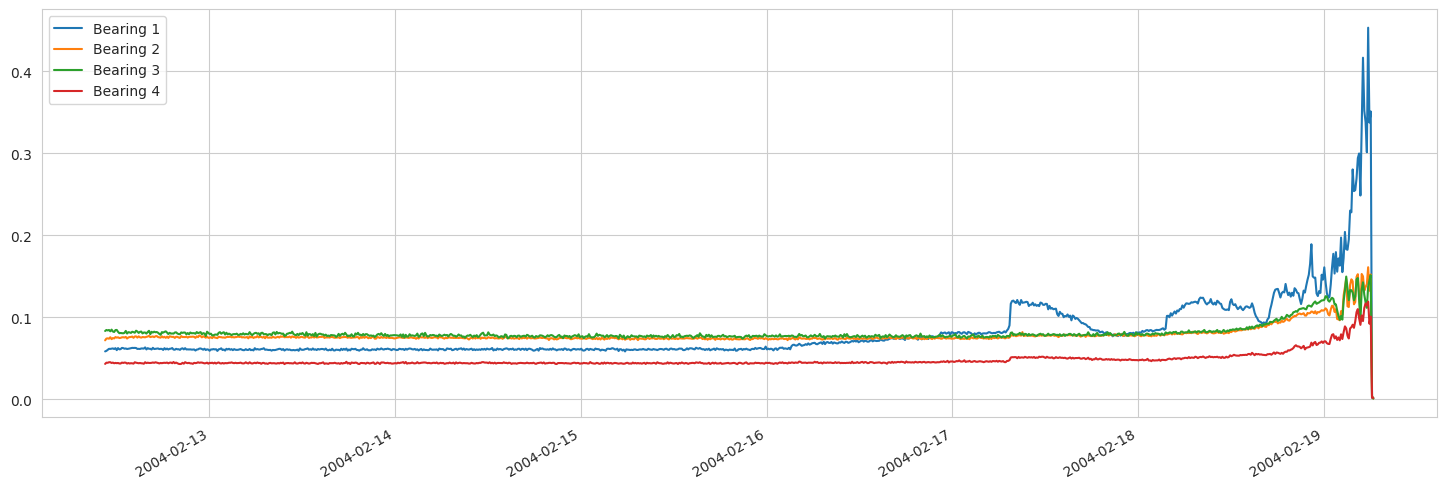

In [48]:
merged_data.plot(figsize = (18, 6))

Test Set 3

In [50]:
data_frames = []

for filename in os.listdir(dataset_path_3rd):
    dataset = pd.read_csv(os.path.join(dataset_path_3rd, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1, 4))
    dataset_mean_abs.index = [filename]
    data_frames.append(dataset_mean_abs)

merged_data = pd.concat(data_frames)

merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

In [51]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')

merged_data = merged_data.sort_index()
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-03-04 09:27:46,0.061630,0.075278,0.051991,0.043475
2004-03-04 09:32:46,0.060774,0.072206,0.052239,0.042039
2004-03-04 09:42:46,0.062195,0.072886,0.054809,0.041360
2004-03-04 09:52:46,0.062994,0.073433,0.054261,0.043126
2004-03-04 10:02:46,0.061945,0.073006,0.053237,0.042617


In [52]:
merged_data.to_csv('ProcessedData/MergedData/DatasetBearingTest_3.csv')

<Axes: >

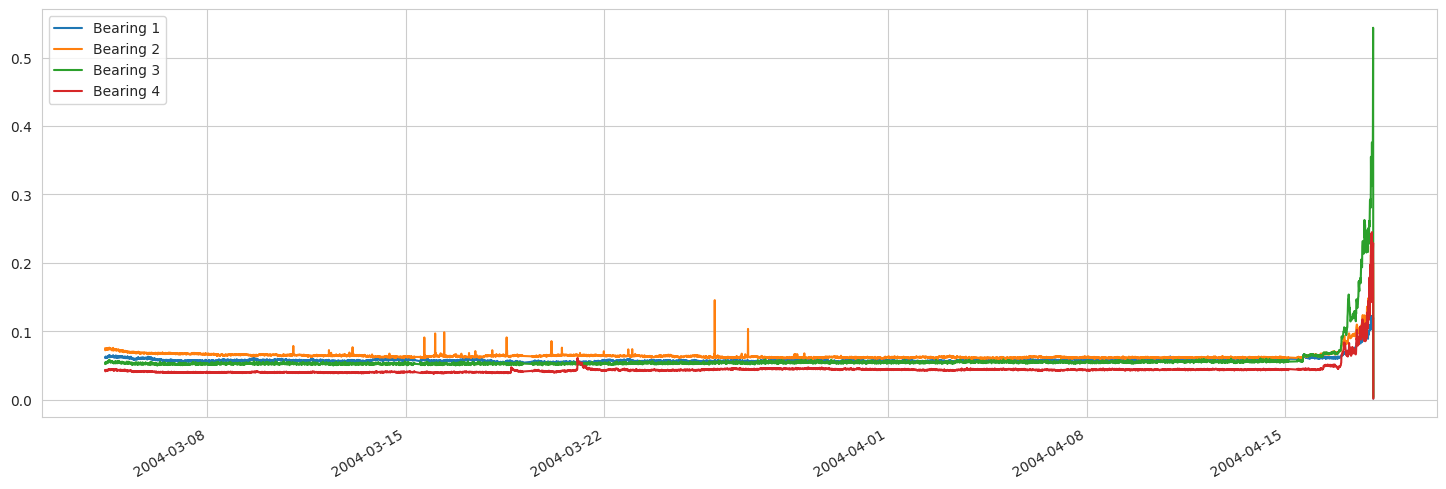

In [53]:
merged_data.plot(figsize = (18, 6))

Now in next phase we will load the data and then will process it to Extract Signal based Statitstical Features

## Signal-Based Statistical Feature Extraction from the Data

In this section, we delve into the extraction of various signal-based statistical features, which provide insights into the characteristics of the data. Below are the definitions and mathematical expressions of these features:

### 1. **Absolute Mean**
   The absolute mean is a measure of the average magnitude of a signal, ignoring its sign. It provides a sense of the overall strength of the signal.

   $$\overline{x} = \frac{1}{N}\sum_{i=1}^{N}|x_i| $$

### 2. **Standard Deviation**
   Standard deviation quantifies the amount of variation or dispersion in a set of signal values. A higher standard deviation indicates more variability around the mean.

   $$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i - \overline{x})^2}$$

### 3. **Skewness**
   Skewness measures the asymmetry of the signal's distribution. A skewed signal suggests that the distribution is not symmetric, and this could indicate the presence of faults.

   $$\mathrm{Sk} = \frac{1}{N}\sum_{i=1}^{N}\frac{(x_i-\overline{x})^3}{\sigma^3}$$

### 4. **Kurtosis**
   Kurtosis describes the tails of the signal's distribution, indicating how prone the signal is to producing outliers. A high kurtosis value could suggest that faults are causing unusual spikes in the signal.

   $$\mathrm{K} = \frac{1}{N}\sum_{i=1}^{N}\frac{(x_i-\overline{x})^4}{\sigma^4}$$

### 5. **Entropy**
   Entropy is a measure of the uncertainty or randomness in the signal. Higher entropy values suggest a more complex and unpredictable signal.

   $$ H(X) = -\sum_{i=1}^{N} P(x_i)\log{P(x_i)} $$

### 6. **Root Mean Square (RMS)**
   RMS provides a measure of the signal's power, accounting for both magnitude and frequency. It is commonly used to quantify the overall energy in the signal.

   $$x_{rms} =\sqrt{(\frac{1}{N})\sum_{i=1}^{N}(x)^{2}}$$

### 7. **Peak to Peak**
   The peak-to-peak value is the difference between the maximum and minimum values of the signal. It gives an indication of the total range of the signal.

   $$ x_p = \max \mathrm{value} - \min \mathrm{value}$$

### 8. **Crest Factor**
   The crest factor is the ratio of the peak value to the RMS value. It is particularly useful for detecting early-stage faults, as it highlights changes in the peakiness of the signal before they affect the overall energy.

   $$x_{crest} =\frac{\max \mathrm{value}}{\mathrm{x_{rms}}}$$

### 9. **Clearance Factor**
   The clearance factor is the ratio of the peak value to the squared mean value of the square roots of the absolute amplitudes. In rotating machinery, this metric decreases as the bearing condition worsens, making it a reliable indicator of defects.

   $$ x_{clear} = \frac{x_p}{(\frac{1}{N}\sum_{i=1}^{N}\sqrt{|x_i|})^2}  $$

### 10. **Shape Factor**
   The shape factor is the ratio of the RMS value to the mean of the absolute values. It is influenced by the shape of the signal but remains independent of its amplitude.

   $$\frac{x_{rms}}{\overline{x}}$$

### 11. **Impulse Factor**
   The impulse factor compares the peak value of the signal to its mean level. This ratio can help identify significant peaks relative to the overall signal level, which is often a sign of faults.

   $$\frac{\max \mathrm{value}}{\overline{x}}  $$


In [ ]:
# Root Mean Squared Sum
def calculate_rms(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

In [ ]:
# extract peak-to-peak features
def calculate_p2p(df):
    return np.array(df.max().abs() + df.min().abs())

In [ ]:
# extract shannon entropy (cut signals to 500 bins)
def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)

In [ ]:
# extract clearence factor
def calculate_clearence(df):
    result = []
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
        result.append(r)
    return result

In [26]:
def time_features(dataset_path, id_set=None):
    time_features = ['mean','std','skew','kurtosis','entropy','rms','max','p2p', 'crest', 'clearence', 'shape', 'impulse']
    cols1 = ['B1_x','B1_y','B2_x','B2_y','B3_x','B3_y','B4_x','B4_y']
    cols2 = ['B1','B2','B3','B4']

    # initialize
    if id_set == 1:
        columns = [c+'_'+tf for c in cols1 for tf in time_features]
        data = pd.DataFrame(columns=columns)
    else:
        columns = [c+'_'+tf for c in cols2 for tf in time_features]
        data = pd.DataFrame(columns=columns)

    merged_data = []  # To collect each DataFrame to merge later

    for filename in os.listdir(dataset_path):
        # read dataset
        raw_data = pd.read_csv(os.path.join(dataset_path, filename), sep='\t')

        # time features
        mean_abs = np.array(raw_data.abs().mean())
        std = np.array(raw_data.std())
        skew = np.array(raw_data.skew())
        kurtosis = np.array(raw_data.kurtosis())
        entropy = calculate_entropy(raw_data)
        rms = np.array(calculate_rms(raw_data))
        max_abs = np.array(raw_data.abs().max())
        p2p = calculate_p2p(raw_data)
        crest = max_abs/rms
        clearence = np.array(calculate_clearence(raw_data))
        shape = rms / mean_abs
        impulse = max_abs / mean_abs

        if id_set == 1:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,8), columns=[c+'_mean' for c in cols1])
            std = pd.DataFrame(std.reshape(1,8), columns=[c+'_std' for c in cols1])
            skew = pd.DataFrame(skew.reshape(1,8), columns=[c+'_skew' for c in cols1])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,8), columns=[c+'_kurtosis' for c in cols1])
            entropy = pd.DataFrame(entropy.reshape(1,8), columns=[c+'_entropy' for c in cols1])
            rms = pd.DataFrame(rms.reshape(1,8), columns=[c+'_rms' for c in cols1])
            max_abs = pd.DataFrame(max_abs.reshape(1,8), columns=[c+'_max' for c in cols1])
            p2p = pd.DataFrame(p2p.reshape(1,8), columns=[c+'_p2p' for c in cols1])
            crest = pd.DataFrame(crest.reshape(1,8), columns=[c+'_crest' for c in cols1])
            clearence = pd.DataFrame(clearence.reshape(1,8), columns=[c+'_clearence' for c in cols1])
            shape = pd.DataFrame(shape.reshape(1,8), columns=[c+'_shape' for c in cols1])
            impulse = pd.DataFrame(impulse.reshape(1,8), columns=[c+'_impulse' for c in cols1])

        else:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,4), columns=[c+'_mean' for c in cols2])
            std = pd.DataFrame(std.reshape(1,4), columns=[c+'_std' for c in cols2])
            skew = pd.DataFrame(skew.reshape(1,4), columns=[c+'_skew' for c in cols2])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,4), columns=[c+'_kurtosis' for c in cols2])
            entropy = pd.DataFrame(entropy.reshape(1,4), columns=[c+'_entropy' for c in cols2])
            rms = pd.DataFrame(rms.reshape(1,4), columns=[c+'_rms' for c in cols2])
            max_abs = pd.DataFrame(max_abs.reshape(1,4), columns=[c+'_max' for c in cols2])
            p2p = pd.DataFrame(p2p.reshape(1,4), columns=[c+'_p2p' for c in cols2])
            crest = pd.DataFrame(crest.reshape(1,4), columns=[c+'_crest' for c in cols2])
            clearence = pd.DataFrame(clearence.reshape(1,4), columns=[c+'_clearence' for c in cols2])
            shape = pd.DataFrame(shape.reshape(1,4), columns=[c+'_shape' for c in cols2])
            impulse = pd.DataFrame(impulse.reshape(1,4), columns=[c+'_impulse' for c in cols2])

        mean_abs.index = [filename]
        std.index = [filename]
        skew.index = [filename]
        kurtosis.index = [filename]
        entropy.index = [filename]
        rms.index = [filename]
        max_abs.index = [filename]
        p2p.index = [filename]
        crest.index = [filename]
        clearence.index = [filename]
        shape.index = [filename]
        impulse.index = [filename]

        # concat
        merge = pd.concat([mean_abs, std, skew, kurtosis, entropy, rms, max_abs, p2p,crest,clearence, shape, impulse], axis=1)
        merged_data.append(merge)

    # Concatenate all collected DataFrames at once
    data = pd.concat(merged_data)

    if id_set == 1:
        cols = [c+'_'+tf for c in cols1 for tf in time_features]
        data = data[cols]
    else:
        cols = [c+'_'+tf for c in cols2 for tf in time_features]
        data = data[cols]

    data.index = pd.to_datetime(data.index, format='%Y.%m.%d.%H.%M.%S')
    data = data.sort_index()
    return data

Getting Relevant Data in CSV

In [27]:
set1 = time_features(dataset_path_1st, id_set=1)
set1.to_csv('ProcessedData/test1_timefeatures.csv')

Exploring the Test Set 1.

In [29]:
set1 = set1.rename(columns={'Unnamed: 0':'time'})
set1

,B1_x_mean,B1_x_std,B1_x_skew,B1_x_kurtosis,B1_x_entropy,B1_x_rms,B1_x_max,B1_x_p2p,B1_x_crest,B1_x_clearence,...,B4_y_skew,B4_y_kurtosis,B4_y_entropy,B4_y_rms,B4_y_max,B4_y_p2p,B4_y_crest,B4_y_clearence,B4_y_shape,B4_y_impulse
2003-10-22 12:06:24,0.104148,0.081124,-0.029900,1.069800,4.803057,0.124617,0.720,1.108,5.777714,0.090932,...,0.008208,1.808719,4.690580,0.115266,0.471,0.845,4.086202,0.089551,1.158299,4.733045
2003-10-22 12:09:13,0.103651,0.079519,-0.070118,1.161960,4.844846,0.123812,0.654,1.042,5.282223,0.090784,...,-0.053721,1.873845,4.666142,0.109210,0.627,0.900,5.741234,0.083762,1.166936,6.699653
2003-10-22 12:14:13,0.105039,0.080220,-0.041579,0.986724,4.889311,0.125249,0.623,0.940,4.974097,0.092058,...,0.047069,1.430242,4.681037,0.113695,0.601,0.977,5.286066,0.088436,1.156631,6.114027
2003-10-22 12:19:13,0.104900,0.080828,0.005235,1.034758,4.852691,0.125200,0.598,1.055,4.776357,0.091833,...,0.021169,1.378689,4.696194,0.114415,0.525,0.852,4.588565,0.088515,1.160373,5.324447
2003-10-22 12:24:13,0.104779,0.082038,-0.060123,1.110658,4.889993,0.125621,0.623,1.011,4.959370,0.091479,...,0.008713,1.498303,4.693572,0.114260,0.522,0.871,4.568532,0.088455,1.160343,5.301063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:32,0.138784,0.120934,0.000689,0.477060,5.204127,0.168642,0.669,1.145,3.966977,0.120038,...,-0.018975,0.671997,5.335049,0.193002,0.786,1.394,4.072505,0.131724,1.247509,5.080488
2003-11-25 23:13:21,0.142147,0.129748,-0.052217,0.555174,5.191541,0.174977,0.803,1.316,4.589186,0.121725,...,-0.021172,0.514551,5.305560,0.204552,0.908,1.616,4.438966,0.138314,1.253199,5.562906
2003-11-25 23:19:56,0.142098,0.128376,-0.080830,0.383461,5.283214,0.174572,0.710,1.159,4.067083,0.121949,...,-0.076739,0.537004,5.307928,0.208231,0.911,1.648,4.374943,0.140434,1.256528,5.497239
2003-11-25 23:29:56,0.141889,0.126898,-0.009047,0.515840,5.249904,0.173459,0.776,1.298,4.473683,0.122149,...,-0.037235,0.563250,5.185493,0.202329,1.157,1.780,5.718411,0.136872,1.252521,7.162427


In [44]:
set1.describe().T

,count,mean,std,min,25%,50%,75%,max
B1_x_mean,2156.0,0.127485,0.006072,0.103651,0.127830,0.128906,0.129829,0.142147
B1_x_std,2156.0,0.098575,0.005345,0.079417,0.096967,0.099051,0.101153,0.129748
B1_x_skew,2156.0,-0.038621,0.030224,-0.137060,-0.058600,-0.038491,-0.017578,0.071573
B1_x_kurtosis,2156.0,0.998634,0.197405,0.279887,0.868275,0.996362,1.124417,1.700413
B1_x_entropy,2156.0,4.981065,0.074409,4.507776,4.936962,4.983200,5.027213,5.304080
...,...,...,...,...,...,...,...,...
B4_y_p2p,2156.0,1.314533,0.713627,0.681000,0.922000,1.062000,1.430250,7.122000
B4_y_crest,2156.0,4.983898,1.876039,2.815276,4.014222,4.390117,5.088637,19.173531
B4_y_clearence,2156.0,0.110994,0.010863,0.058448,0.107784,0.109048,0.115484,0.213670
B4_y_shape,2156.0,1.183745,0.038067,1.055297,1.158352,1.165705,1.215412,1.386364


In [31]:
time_features_list = ["mean","std","skew","kurtosis","entropy","rms","max","p2p", "crest", "clearence", "shape", "impulse"]
bearings_xy = [["B"+str(n)+"_"+str(o)+"_" for n in range(1,5)] for o in ['x','y'] ]
#print(bearings_xy)
for tf in time_features_list:
    fig = plt.figure()
    #figure into a 1x4 grid, and give me the first section
    ax1 = fig.add_subplot(141)
    #figure into a 1x4 grid, and give me the second section
    ax2 = fig.add_subplot(142)
    ax3 = fig.add_subplot(143)
    ax4 = fig.add_subplot(144)
    axes = [ax1,ax2,ax3, ax4]

    for i in range(4):
        col = bearings_xy[0][i]+tf
        set1[col].plot(figsize = (36,6), title="Bearing{} x-y_".format(i+1)+tf , legend = True, ax=axes[i])
        col = bearings_xy[1][i]+tf
        set1[col].plot(figsize = (36,6) , legend = True, ax=axes[i])
        axes[i].set(xlabel="cycle", ylabel="value")

Output hidden; open in https://colab.research.google.com to view.

Processing both Test 2 and 4 to csv

In [32]:
set2 = time_features(dataset_path_2nd, id_set=2)
set2.to_csv('ProcessedData/test2_timefeatures.csv')

In [33]:
set2 = set2.rename(columns={'Unnamed: 0':'time'})
set2

,B1_mean,B1_std,B1_skew,B1_kurtosis,B1_entropy,B1_rms,B1_max,B1_p2p,B1_crest,B1_clearence,...,B4_skew,B4_kurtosis,B4_entropy,B4_rms,B4_max,B4_p2p,B4_crest,B4_clearence,B4_shape,B4_impulse
2004-02-12 10:32:39,0.058333,0.073478,0.083929,0.629118,4.811406,0.074180,0.454,0.840,6.120246,0.049037,...,-0.022081,0.066118,4.494251,0.054105,0.264,0.457,4.879424,0.036259,1.256305,6.130047
2004-02-12 10:42:39,0.058995,0.075339,0.052054,0.648930,4.835310,0.075382,0.388,0.757,5.147132,0.049523,...,0.001645,0.107769,4.545837,0.056102,0.249,0.478,4.438343,0.037465,1.259558,5.590350
2004-02-12 10:52:39,0.060236,0.076189,0.032869,0.514258,4.848343,0.076228,0.503,0.903,6.598658,0.050765,...,0.070516,0.257503,4.544783,0.056146,0.354,0.688,6.304948,0.037331,1.263332,7.965243
2004-02-12 11:02:39,0.061455,0.078694,0.041523,1.158352,4.761551,0.078726,0.608,1.184,7.723037,0.051553,...,-0.036409,0.806635,4.553737,0.056808,0.525,1.038,9.241630,0.037989,1.260124,11.645601
2004-02-12 11:12:39,0.061361,0.078440,0.028134,0.603647,4.875062,0.078475,0.391,0.782,4.982488,0.051293,...,0.019103,0.139316,4.560105,0.056841,0.244,0.456,4.292638,0.037949,1.259831,5.407997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:39,0.453335,0.725031,-0.510599,12.580341,4.741775,0.725019,5.000,9.998,6.896372,0.352339,...,-0.051965,-0.093155,5.447651,0.148355,0.544,1.086,3.666888,0.101178,1.246182,4.569610
2004-02-19 05:52:39,0.337583,0.462011,-0.325334,3.760925,5.060548,0.462021,2.881,5.569,6.235642,0.276993,...,0.119964,0.259866,5.271205,0.116632,0.527,0.976,4.518482,0.077454,1.266026,5.720515
2004-02-19 06:02:39,0.351111,0.483856,-0.377115,4.892858,4.847961,0.483847,3.696,7.197,7.638775,0.287486,...,0.168010,0.697463,5.302036,0.130585,0.625,1.104,4.786137,0.083878,1.295267,6.199325
2004-02-19 06:12:39,0.001857,0.000987,0.579749,3.638400,0.592386,0.002103,0.005,0.005,2.377538,0.001566,...,0.656739,1.653228,0.758412,0.002154,0.005,0.007,2.321614,0.001370,1.205914,2.799666


In [43]:
set2.describe().T

,count,mean,std,min,25%,50%,75%,max
B1_mean,984.0,0.080905,0.040171,0.001168,0.060765,0.062007,0.083223,0.453335
B1_std,984.0,0.106090,0.058234,0.000987,0.077112,0.078748,0.108790,0.725031
B1_skew,984.0,-0.033128,0.089037,-0.766212,-0.047476,-0.009827,0.013673,0.579749
B1_kurtosis,984.0,0.827643,0.966001,-1.609923,0.393975,0.485346,0.879248,14.113736
B1_entropy,984.0,4.985907,0.260572,0.592386,4.860787,4.880541,5.135371,5.676568
B1_rms,984.0,0.106111,0.058225,0.001533,0.077136,0.078779,0.108819,0.725019
B1_max,984.0,0.555001,0.388084,0.005000,0.393000,0.442000,0.576000,5.000000
B1_p2p,984.0,1.054736,0.740102,0.005000,0.752000,0.830000,1.101750,9.998000
B1_crest,984.0,5.173858,0.576191,2.377538,4.816641,5.097674,5.440268,9.333170
B1_clearence,984.0,0.066902,0.032068,0.000681,0.051044,0.052136,0.068917,0.352339


In [35]:
set3 = time_features(dataset_path_3rd, id_set=3)
set3.to_csv('ProcessedData/test3_timefeatures.csv')

In [36]:
set3 = set3.rename(columns={'Unnamed: 0':'time'})
set3

,B1_mean,B1_std,B1_skew,B1_kurtosis,B1_entropy,B1_rms,B1_max,B1_p2p,B1_crest,B1_clearence,...,B4_skew,B4_kurtosis,B4_entropy,B4_rms,B4_max,B4_p2p,B4_crest,B4_clearence,B4_shape,B4_impulse
2004-03-04 09:27:46,0.061630,0.079632,0.030945,1.293219,4.797487,0.079770,0.569,1.116,7.133019,0.051330,...,0.038762,0.560486,4.529537,0.055493,0.303,0.557,5.460149,0.036303,1.276447,6.969589
2004-03-04 09:32:46,0.060774,0.078513,-0.013895,1.157942,4.868368,0.078677,0.491,0.952,6.240741,0.050616,...,0.013937,0.356269,4.487724,0.053352,0.249,0.461,4.667121,0.035253,1.269095,5.923021
2004-03-04 09:42:46,0.062195,0.079787,0.033416,0.890444,4.889695,0.079817,0.515,0.969,6.452262,0.052032,...,0.034319,0.478659,4.480881,0.052704,0.278,0.556,5.274739,0.034633,1.274279,6.721489
2004-03-04 09:52:46,0.062994,0.081046,-0.027055,1.182243,4.834093,0.081084,0.552,1.072,6.807721,0.052700,...,0.007334,0.342723,4.519586,0.054843,0.300,0.569,5.470193,0.036072,1.271674,6.956300
2004-03-04 10:02:46,0.061945,0.079128,-0.017849,0.586162,4.885535,0.079166,0.381,0.750,4.812653,0.051895,...,0.023480,0.262501,4.505514,0.053912,0.247,0.474,4.581558,0.035797,1.265030,5.795806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:55,0.122483,0.154771,0.161938,0.284736,5.333972,0.154788,0.742,1.409,4.793663,0.103239,...,-0.026604,0.022745,5.564207,0.248086,0.955,1.822,3.849468,0.163276,1.271138,4.893207
2004-04-18 02:12:55,0.110250,0.137863,0.109064,0.035596,5.328223,0.137873,0.613,1.189,4.446121,0.093522,...,0.104359,-0.257408,5.640416,0.253657,0.918,1.731,3.619058,0.176263,1.232366,4.460003
2004-04-18 02:22:55,0.115789,0.147167,0.291530,0.553389,5.254552,0.147183,0.754,1.442,5.122891,0.097510,...,0.002816,0.031035,5.501685,0.279857,1.104,2.186,3.944873,0.187490,1.259629,4.969075
2004-04-18 02:32:55,0.119909,0.154457,0.440061,1.094297,5.235420,0.154483,0.933,1.565,6.039509,0.100311,...,-0.108542,-0.485606,5.672543,0.282170,0.969,1.850,3.434099,0.194709,1.232046,4.230966


In [42]:
set3.describe().T

,count,mean,std,min,25%,50%,75%,max
B1_mean,6324.0,0.058445,0.005061,0.001533,0.056456,0.057655,0.059216,0.122483
B1_std,6324.0,0.074130,0.006521,0.001143,0.071425,0.073141,0.075327,0.155116
B1_skew,6324.0,0.021646,0.035822,-0.223003,-0.000022,0.020605,0.042560,0.440061
B1_kurtosis,6324.0,0.432336,0.179963,0.021923,0.314121,0.409700,0.518796,2.064648
B1_entropy,6324.0,4.815292,0.076473,0.756613,4.785344,4.807906,4.835577,5.355222
B1_rms,6324.0,0.074168,0.006517,0.001912,0.071466,0.073176,0.075366,0.155129
B1_max,6324.0,0.402556,0.072424,0.005000,0.356000,0.388000,0.430000,1.072000
B1_p2p,6324.0,0.754292,0.116342,0.007000,0.681000,0.733000,0.801000,1.858000
B1_crest,6324.0,5.416952,0.762777,2.615010,4.904327,5.256287,5.764120,10.256285
B1_clearence,6324.0,0.049120,0.004245,0.001067,0.047506,0.048448,0.049694,0.103737


Slice Features (Mean, RMS, Skewness, Kurtosis)

In [ ]:
# cols = ['B1_mean','B1_rms','B1_skew','B1_kurtosis',
#         'B2_mean','B2_rms','B2_skew','B2_kurtosis',
#         'B3_mean','B3_rms','B3_skew','B3_kurtosis',
#         'B4_mean','B4_rms','B4_skew','B4_kurtosis',]
# set1 = set1[cols]
# set2 = set2[cols]
# set3 = set3[cols]

In [38]:
def plot_features(df):
    fig, axes = plt.subplots(4, 1, figsize=(15, 5*4))

    axes[0].plot(df['B1_mean'])
    axes[0].plot(df['B2_mean'])
    axes[0].plot(df['B3_mean'])
    axes[0].plot(df['B4_mean'])
    axes[0].legend(['B1','B2','B3','B4'])
    axes[0].set_title('Mean')

    axes[1].plot(df['B1_rms'])
    axes[1].plot(df['B2_rms'])
    axes[1].plot(df['B3_rms'])
    axes[1].plot(df['B4_rms'])
    axes[1].legend(['B1','B2','B3','B4'])
    axes[1].set_title('RMS')

    axes[2].plot(df['B1_skew'])
    axes[2].plot(df['B2_skew'])
    axes[2].plot(df['B3_skew'])
    axes[2].plot(df['B4_skew'])
    axes[2].legend(['B1','B2','B3','B4'])
    axes[2].set_title('Skewness')

    axes[3].plot(df['B1_kurtosis'])
    axes[3].plot(df['B2_kurtosis'])
    axes[3].plot(df['B3_kurtosis'])
    axes[3].plot(df['B4_kurtosis'])
    axes[3].legend(['B1','B2','B3','B4'])
    axes[3].set_title('Kurtosis')

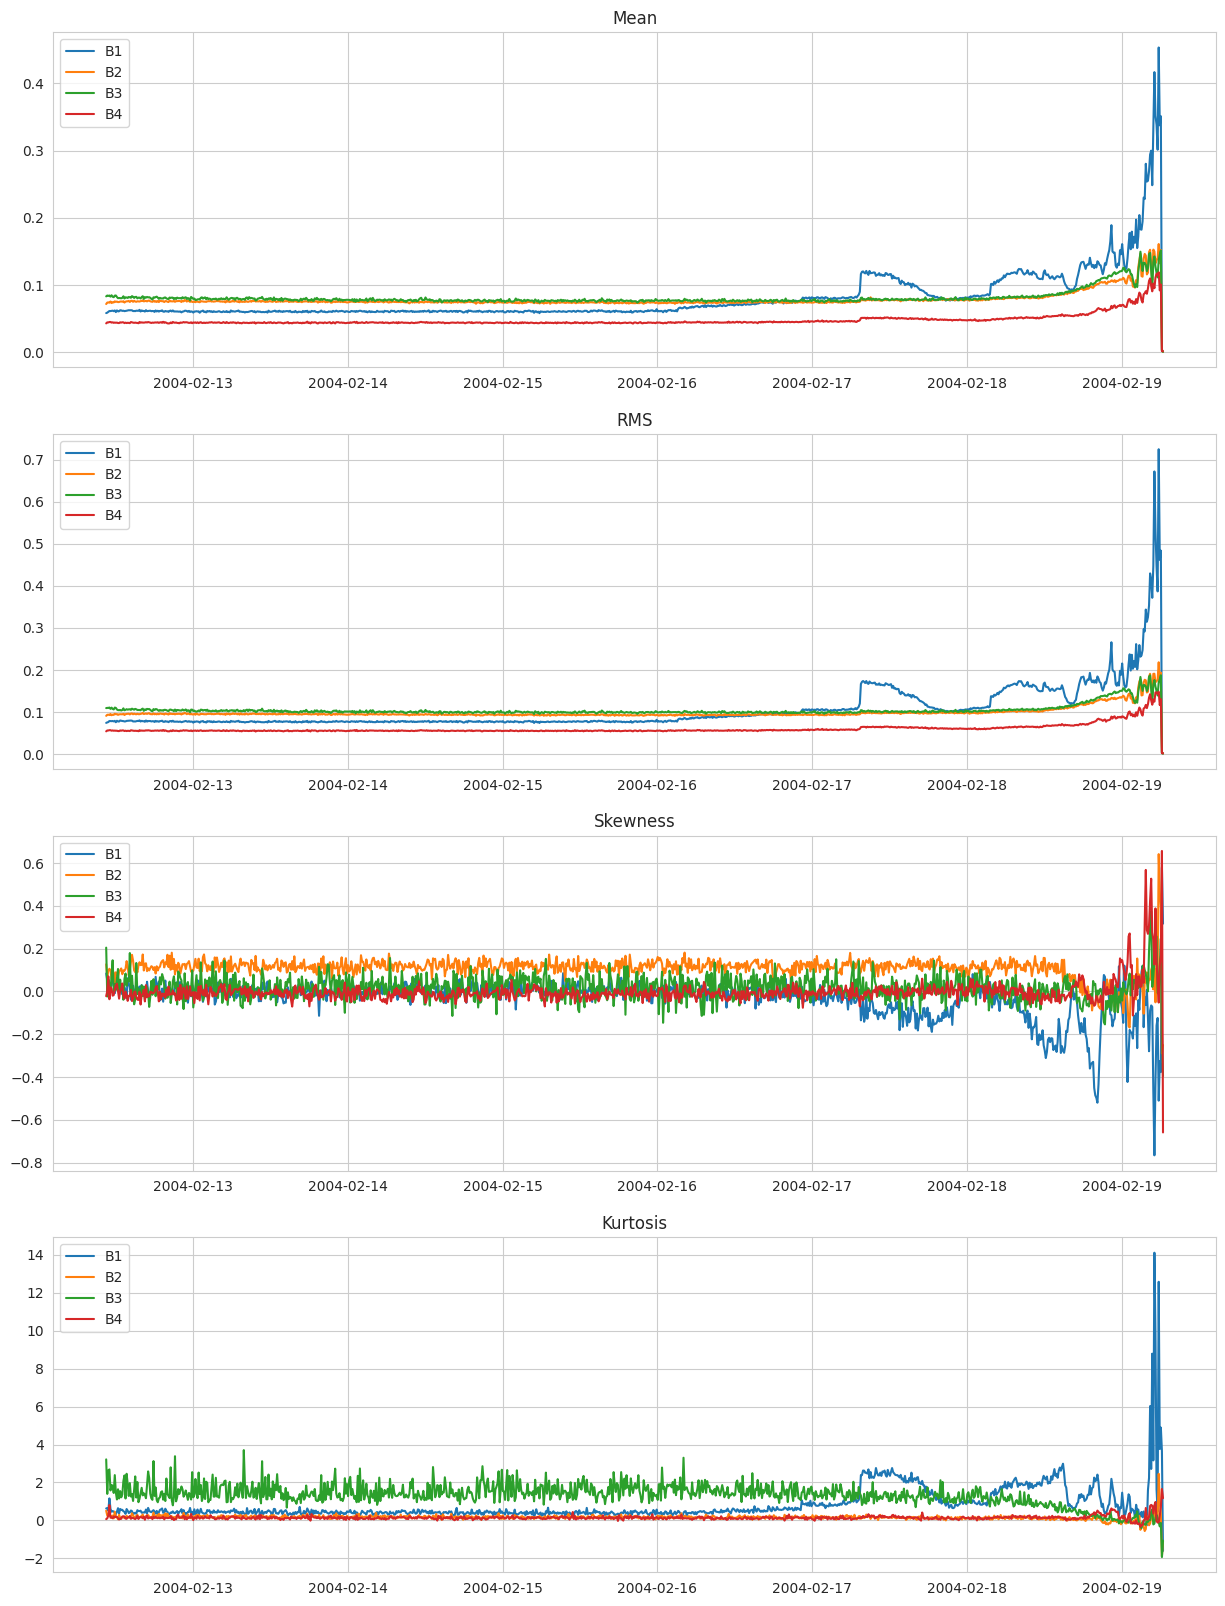

In [39]:
plot_features(set2)

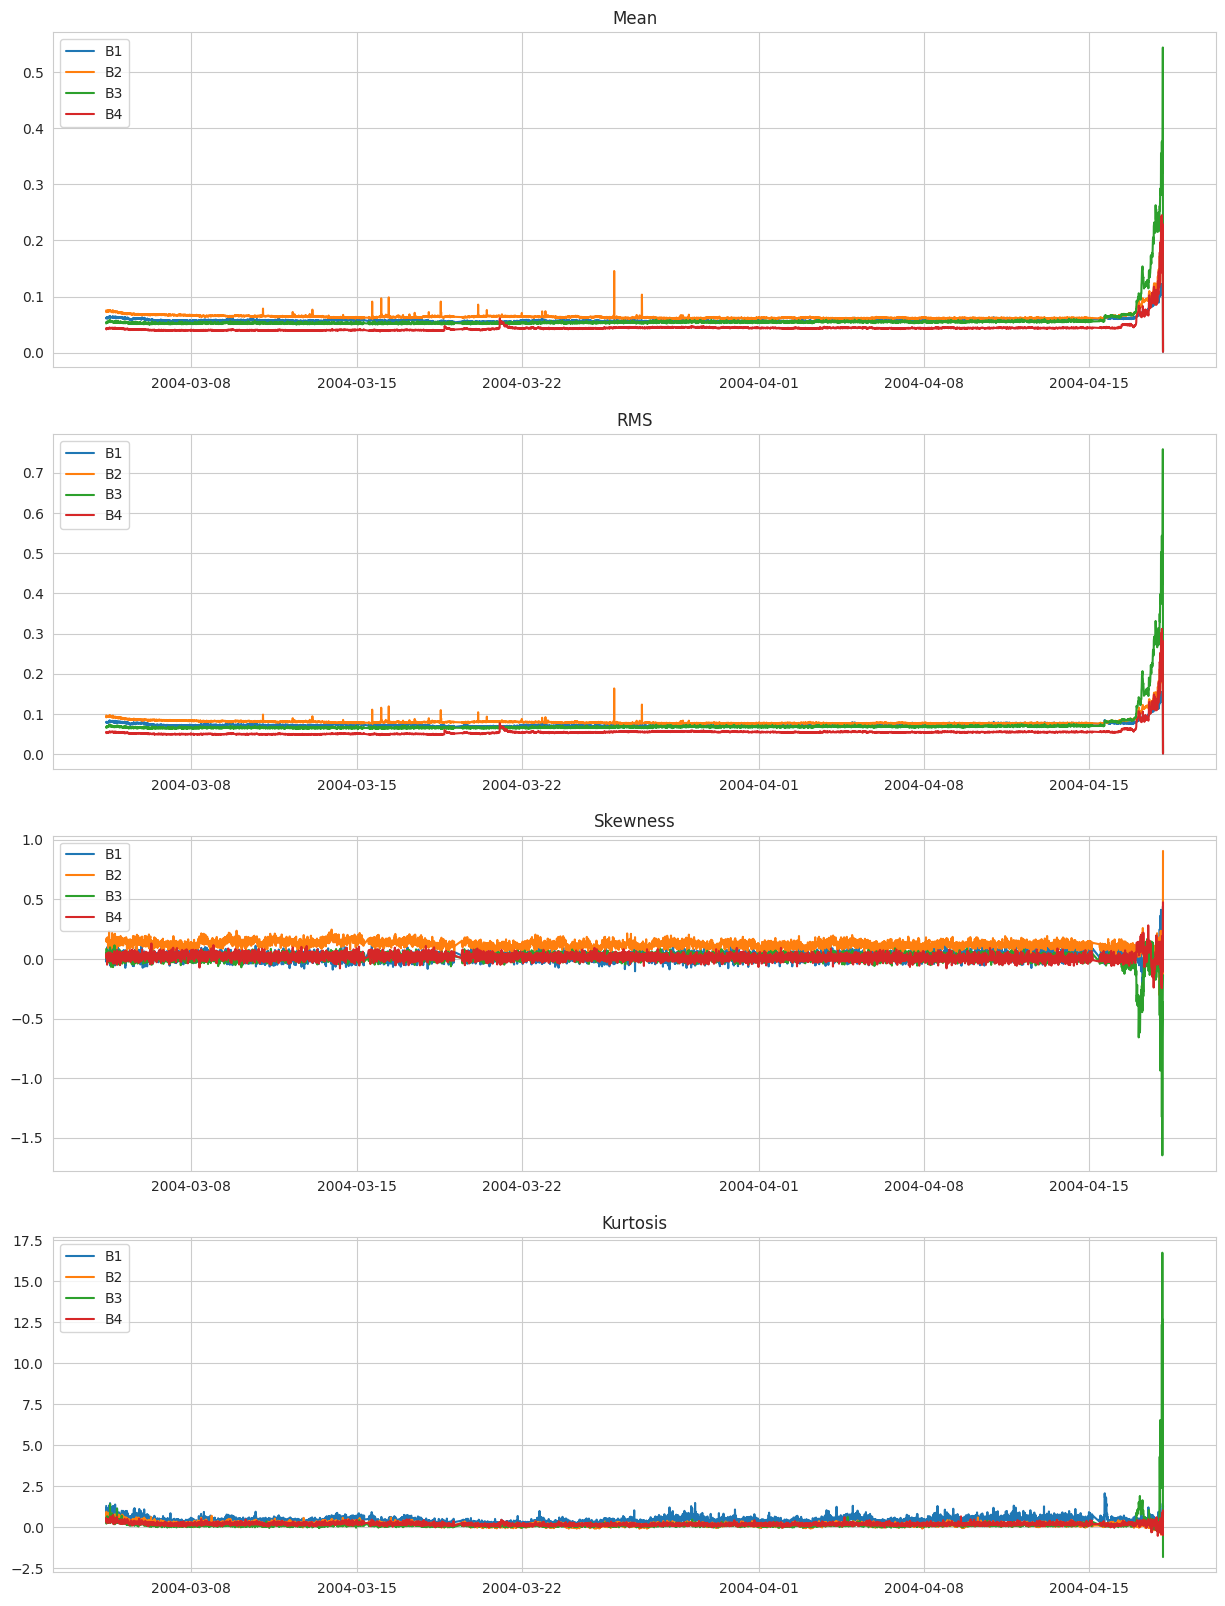

In [41]:
plot_features(set3)